In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, HoverTool
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df=pd.read_hdf('model/googlenews/df.h5', 'table')

In [4]:
df_nap=df[df['From']=='nap']

In [5]:
df_nap.sample(5)

,product_id,designer_original_name,product_name,comb_desc,From,style,pre_trained_embedding
964823,5b0141194500d65c4d2fe524,Theory,Striped cotton-jersey T-shirt,strip cottonjersey tshirt design close fit mid...,nap,None,"[-0.0004429899, 0.00054965616, -0.00092856114,..."
956580,5b013ef04500d65c4d2fae5b,Petar Petrov,Striped crinkled patent-leather straight-leg p...,strip crinkle patentleather straightleg pant h...,nap,None,"[0.00018548261, 0.0005985029, -0.00070252595, ..."
959237,5b013f774500d65c4d2fbbd9,Madewell,Washed-leather biker jacket,washedleather biker jacket design slim fit sup...,nap,None,"[-2.1539896e-05, 0.00064534234, -0.0007066189,..."
961332,5b01403d4500d65c4d2fcf57,Paul & Joe,Striped satin-jacquard dress,striped satinjacquard dress design loose fit m...,nap,None,"[-0.00016986791, -9.60736e-05, -0.0010830535, ..."
965051,5b0141264500d65c4d2fe673,Bassike,Printed cotton-gauze T-shirt,print cottongauze tshirt fit true size normal ...,nap,None,"[-0.00051041326, 0.00067268906, -0.0012739031,..."


In [6]:
x=np.vstack(df_nap['pre_trained_embedding'])
x.shape

(9627, 300)

In [7]:
db = DBSCAN(eps=0.05, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


In [8]:
k=10
km = KMeans(n_clusters=k, n_init=20).fit(x)
colors=km.labels_

t-SNE: 114.16 sec
t-SNE: 123.99 sec
t-SNE: 187.58 sec
t-SNE: 235.17 sec
t-SNE: 350.95 sec


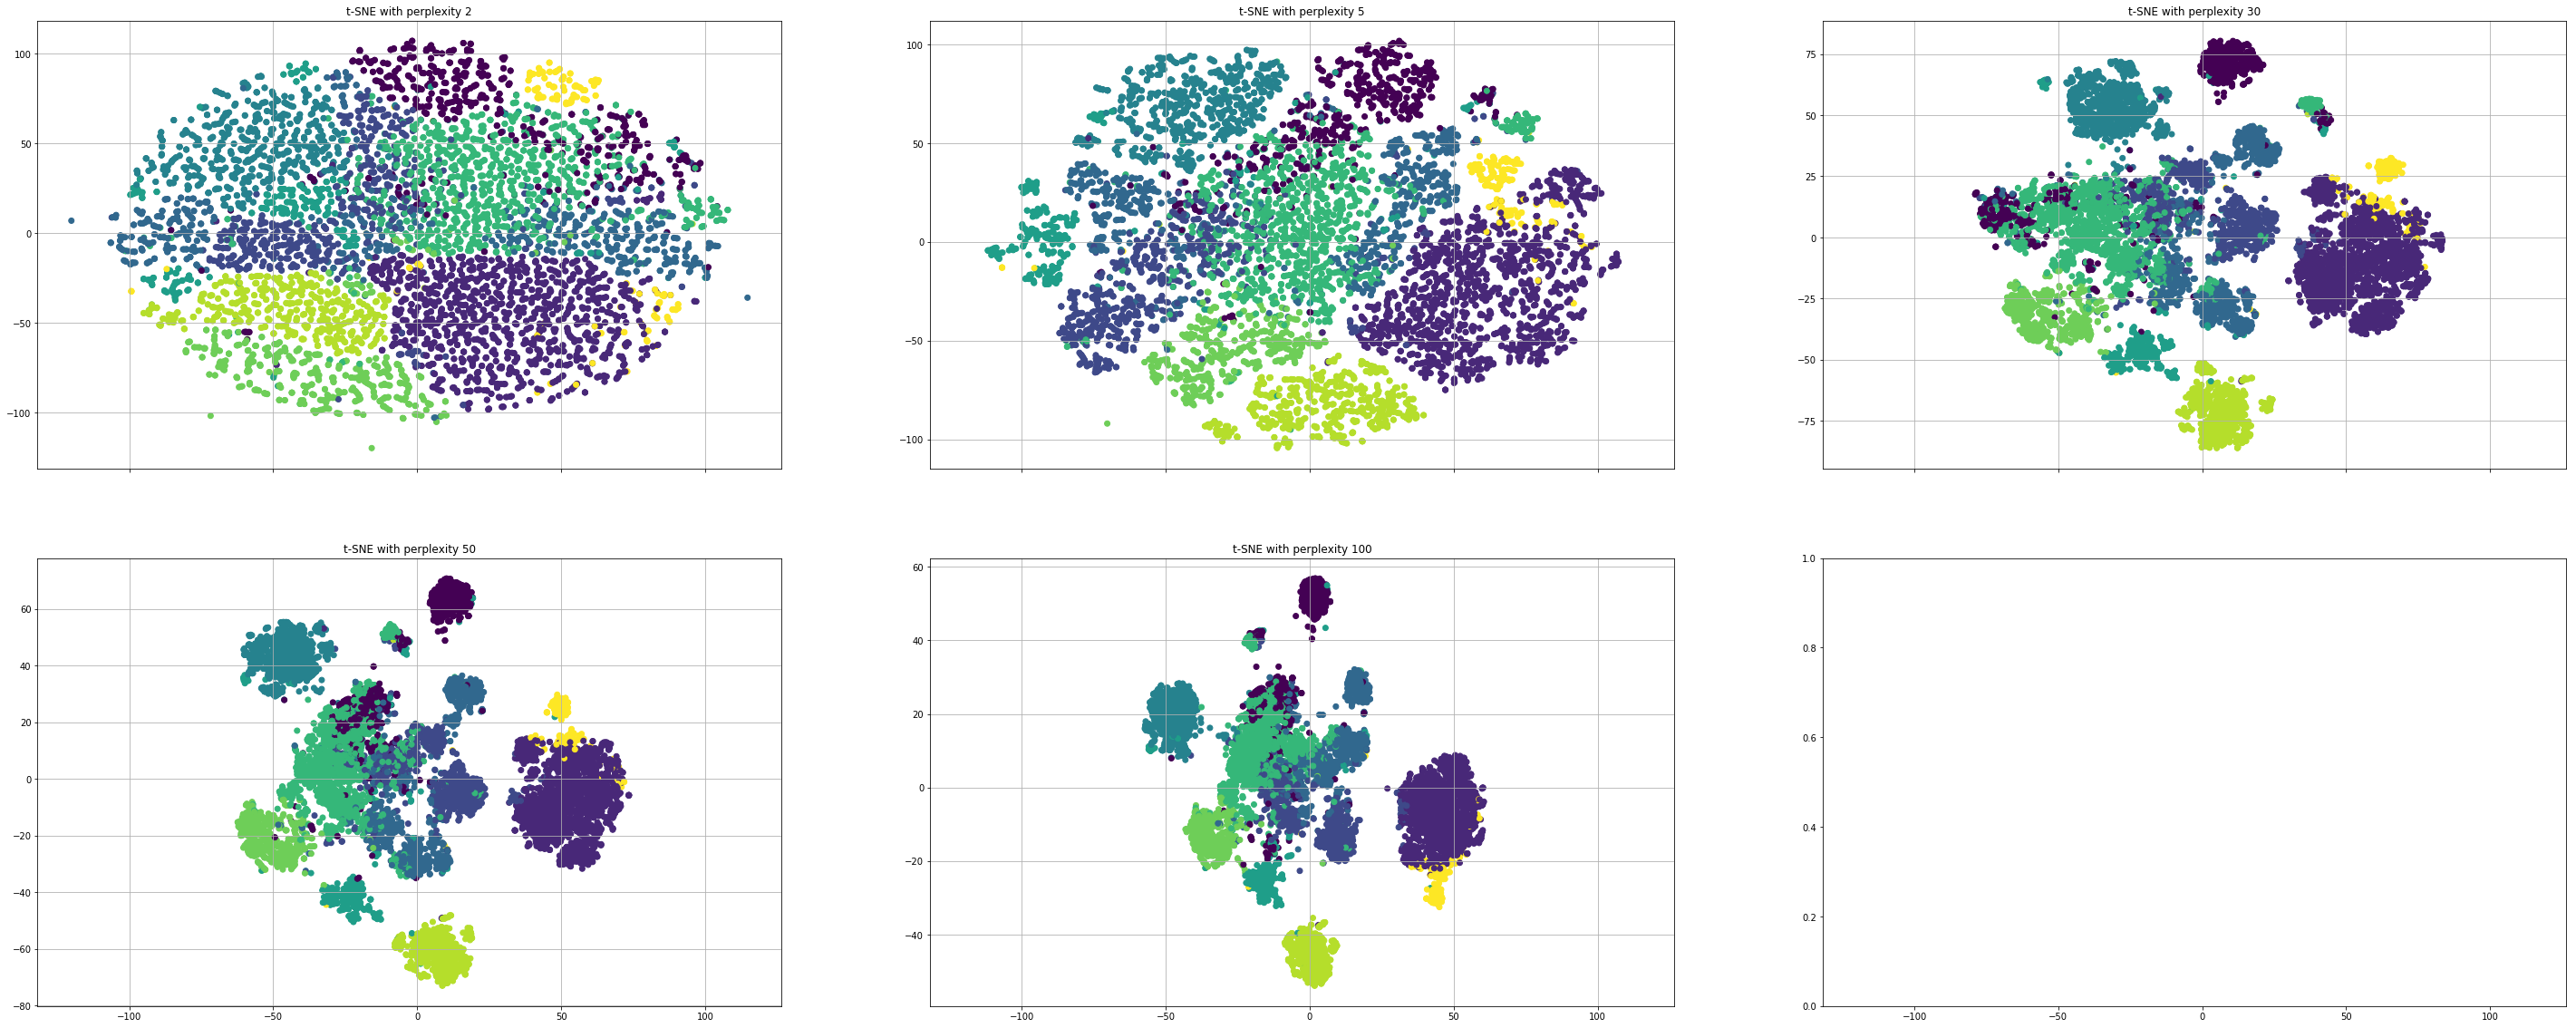

In [9]:
n_iter = 1000
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(50,20))
titles = ['t-SNE with perplexity 2', 't-SNE with perplexity 5', 't-SNE with perplexity 30', 't-SNE with perplexity 50', 't-SNE with perplexity 100']

for ax, title, i in zip(axes.flat, titles, [2,5,30,50,100]):    
    t0 = time()
    model = TSNE(n_components=2, n_iter = n_iter, random_state=0, perplexity =i)
    Y = model.fit_transform(x)
    t1 =time()
    print( "t-SNE: %.2f sec" % (t1 -t0))
    ax.scatter(Y[:, 0], Y[:, 1], c=colors)
    ax.set_title(title)
    ax.grid(True)
    
plt.show()

In [13]:
%%time
x=np.vstack(df_nap['pre_trained_embedding'])
x.shape
model1 = TSNE(n_components=3, n_iter = n_iter, random_state=0, perplexity = 50)
Y1 = model1.fit_transform(x)

CPU times: user 10min 59s, sys: 12.4 s, total: 11min 11s
Wall time: 11min 11s


In [14]:
Y1.shape

(9627, 3)

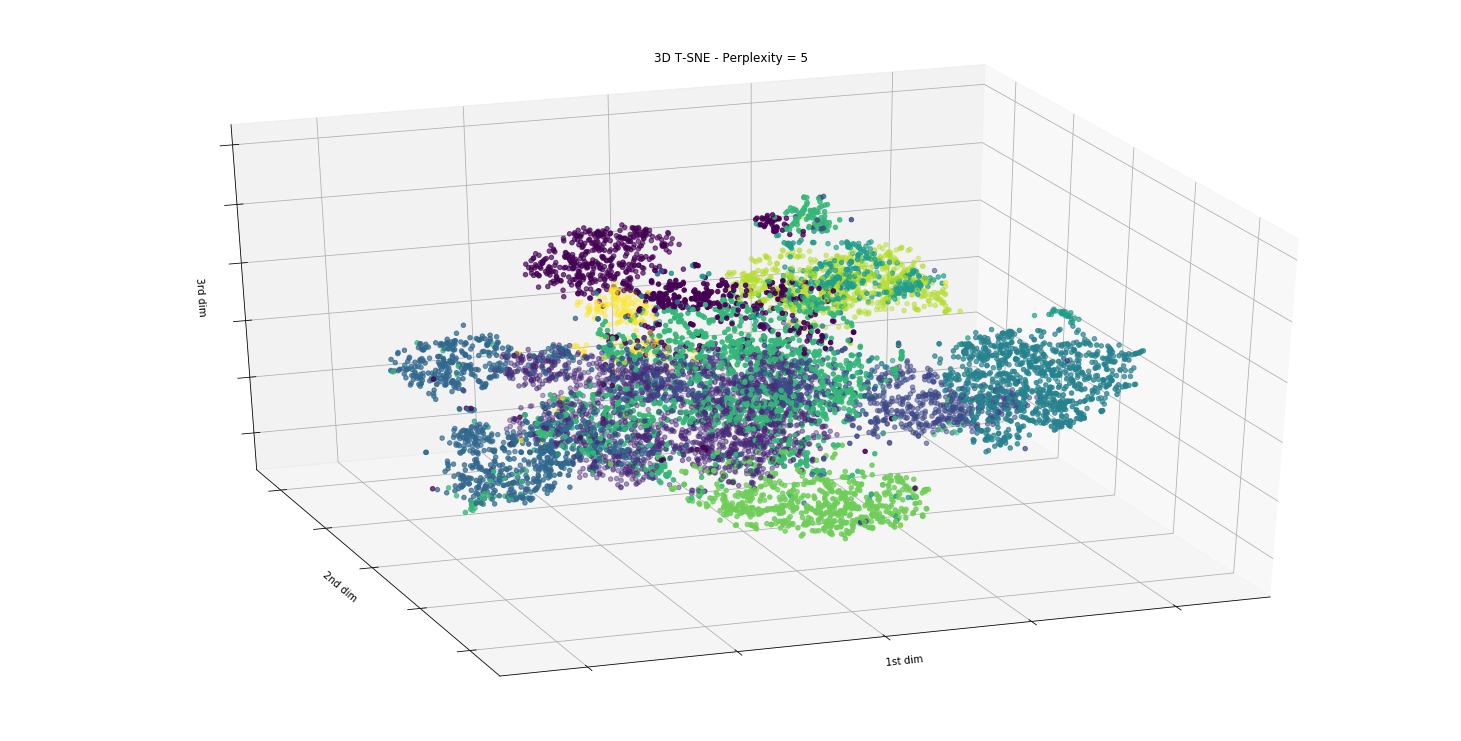

In [15]:
fig = plt.figure(1, figsize=(20, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Y1[:, 0], Y1[:, 1], Y1[:, 2], c= colors)
           #cmap=plt.cm.Paired)
ax.set_title("3D T-SNE - Perplexity = {}".format(5))
ax.set_xlabel("1st dim")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd dim")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd dim")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [97]:
cluster_map = df_nap
cluster_map['cluster'] = km.labels_
cluster_map.head()

/home/ubuntu/.virtualenvs/hana/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,product_id,designer_original_name,product_name,comb_desc,From,style,tf_ft_desc_embedding,cluster
955818,5b013e8c4500d65c4d2fa40d,Burberry,Pintucked polka-dot silk midi skirt,pintucked polkadot silk midi skirt midilength ...,nap,classic,"[0.003036608, 0.0035108787, 0.00073204795, -0....",6
955819,5b013e8c4500d65c4d2fa410,The Row,Haylen hooded shell coat,haylen hood shell coat cut loose fit sized lay...,nap,None,"[0.0031637968, 0.0026509725, -0.0010945441, -0...",0
955820,5b013e8c4500d65c4d2fa411,Alaïa,Fine-knit wool bodysuit,fineknit wool bodysuit design close fit slight...,nap,None,"[0.0048617213, 0.0038800626, -0.002506889, -0....",5
955821,5b013e8c4500d65c4d2fa412,Simone Rocha,Mesh-paneled ruffled washed silk-satin dress,meshpaneled ruffled washed silksatin dress des...,nap,None,"[0.0025773828, 0.0035503092, -0.000460625, -0....",3
955822,5b013e8c4500d65c4d2fa413,Ann Demeulemeester,Ribbed stretch-jersey tank,rib stretchjersey tank design close fit partic...,nap,None,"[0.004313028, 0.0033918552, -0.0015635215, -0....",9
